In [1]:
import os

import numpy as np
import pandas as pd
import finpy_tse as tse
import time
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew, kurtosis

In [2]:
#major_symbols = tse.Build_Market_StockList(bourse=True, farabourse=True, payeh=False)
#major_symbols.to_excel('F:\my project\data\\tehran_stock_exchange\\major_symbols.xlsx')

In [3]:
symbols = pd.read_excel('F:\my project\data\\tehran_stock_exchange\\major_symbols.xlsx')
symbols

,Ticker,Name,Market,Panel,Sector,Sub-Sector,Comment,Name(EN),Company Code(12),Ticker(4),Ticker(5),Ticker(12),Sector Code,Sub-Sector Code,Panel Code
0,آباد,توریستی ورفاهی آبادگران ایران,بورس,بازار اول (تابلوی فرعی) بورس,هتل و رستوران,هتل ها ، اردو و دیگر تدارکات اقامت کوتاه,-,Abadgaran,IRO1ABAD0002,ABAD,ABAD1,IRO1ABAD0001,55,5510,3
1,آبادا,تولید نیروی برق آبادان,بورس,بازار دوم بورس,عرضه برق، گاز، بخاروآب گرم,تولید انتقال و توزیع نیروی برق,-,Abadan PG,IRO1NBAB0009,NBAB,NBAB1,IRO1NBAB0001,40,4010,3
2,آپ,آسان پرداخت پرشین,بورس,بازار دوم بورس,رایانه و فعالیت های وابسته به آن,مشاوره و تهیه نرم افزار,-,Asan Pardakht Pers,IRO1APPE0008,APPE,APPE1,IRO1APPE0001,72,7220,1
3,آسیا,بیمه آسیا,بورس,بازار اول (تابلوی فرعی) بورس,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,بیمه غیرزندگی,-,Asia Bime,IRO1ASIA0008,ASIA,ASIA1,IRO1ASIA0001,66,6603,3
4,اپال,فرآوری معدنی اپال کانی پارس,بورس,بازار دوم بورس,استخراج کانه های فلزی,استخراج آهن,-,Opal Kani Pars,IRO1OPAL0000,OPAL,OPAL1,IRO1OPAL0001,13,1310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,ثبهساز,بهساز کاشانه تهران,بورس,بازار اول (تابلوی اصلی) بورس,انبوه سازی، املاک و مستغلات,املاک و مستغلات با ملک خود یا لیزینگ شده,-,Behsaz K Tehran,IRO1BEKA0009,BEKA,BEKA1,IRO1BEKA0001,70,7010,1
572,پرداخت,به پرداخت ملت,بورس,بازار دوم بورس,رایانه و فعالیت های وابسته به آن,مشاوره و تهیه نرم افزار,-,Behpardakht Mellat,IRO1PRKT0007,PRKT,PRKT1,IRO1PRKT0001,72,7220,3
573,جم,پتروشیمی جم,بورس,بازار دوم بورس,محصولات شیمیایی,تولید مواد شیمیایی پایه به جز کود,-,Jam Petr.,IRO1PJMZ0007,PJMZ,PJMZ1,IRO1PJMZ0001,44,4411,1
574,البرز,بیمه البرز,بورس,بازار اول (تابلوی اصلی) بورس,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,بیمه غیرزندگی,-,S*Alborz Bimeh,IRO1BALB0001,BALB,BALB1,IRO1BALB0001,66,6603,1


In [4]:
close_data = pd.DataFrame([])

In [6]:
#tse.get_price_history(symbols.Ticker[0],ignore_date=True)['Close']

In [7]:
for i in symbols.Ticker:
    try:
        close_data[i] = tse.get_price_history(i, ignore_date=True)['Close']
    except:
        pass

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5324\1884699609.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_data[i] = tse.get_price_history(i, ignore_date=True)['Close']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5324\1884699609.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_data[i] = tse.get_price_history(i, ignore_date=True)['Close']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5324\1884699609.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [8]:
close_data

,آباد,آبادا,آپ,آسیا,اپال,اتکام,اخابر,اردستان,اسیاتک,افق,...,ولشرق,ومعلم,وملل,وهامون,وهور,ثبهساز,پرداخت,جم,البرز,خلنت
J-Date,,,,,,,,,,,,,,,,,,,,,
1383-10-26,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383-10-27,1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383-10-28,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383-11-07,2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383-11-11,2162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402-12-01,61290,10330.0,6470.0,NaN,13040.0,2609.0,10910.0,13920.0,8700.0,19160.0,...,4499.0,2477.0,2223.0,3946.0,1926.0,2960.0,9070.0,46550.0,2541.0,33750.0
1402-12-02,60340,10260.0,6660.0,NaN,13050.0,2630.0,10800.0,14030.0,8540.0,19290.0,...,4441.0,2434.0,2240.0,3895.0,1941.0,2920.0,8960.0,46370.0,2552.0,34200.0
1402-12-05,57250,10130.0,6580.0,1589.0,13070.0,2531.0,10760.0,13950.0,8160.0,19480.0,...,4260.0,2427.0,2260.0,3747.0,1933.0,2866.0,8790.0,46200.0,2542.0,32290.0


In [9]:
#tse.Get_CWI_History(ignore_date=True)

In [10]:
close_data['شاخص_کل'] = tse.Get_CWI_History(ignore_date=True)['Close']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5324\330964444.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_data['شاخص_کل'] = tse.Get_CWI_History(ignore_date=True)['Close']


In [11]:
close_data.to_excel('F:\my project\data\\tehran_stock_exchange\\close_data.xlsx')

In [3]:
close_data = pd.read_excel('F:\my project\data\\tehran_stock_exchange\\close_data.xlsx')

In [4]:
close_data

,J-Date,آباد,آبادا,آپ,آسیا,اپال,اتکام,اخابر,اردستان,اسیاتک,...,ومعلم,وملل,وهامون,وهور,ثبهساز,پرداخت,جم,البرز,خلنت,شاخص_کل
0,1383-10-26,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1383-10-27,1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1383-10-28,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1383-11-07,2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1383-11-11,2162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,1402-12-01,61290,10330.0,6470.0,NaN,13040.0,2609.0,10910.0,13920.0,8700.0,...,2477.0,2223.0,3946.0,1926.0,2960.0,9070.0,46550.0,2541.0,33750.0,2071418.0
3651,1402-12-02,60340,10260.0,6660.0,NaN,13050.0,2630.0,10800.0,14030.0,8540.0,...,2434.0,2240.0,3895.0,1941.0,2920.0,8960.0,46370.0,2552.0,34200.0,2070816.0
3652,1402-12-05,57250,10130.0,6580.0,1589.0,13070.0,2531.0,10760.0,13950.0,8160.0,...,2427.0,2260.0,3747.0,1933.0,2866.0,8790.0,46200.0,2542.0,32290.0,2066111.0
3653,1402-12-07,53950,9920.0,6370.0,1555.0,12840.0,2517.0,10280.0,13690.0,7600.0,...,2500.0,2189.0,3560.0,1938.0,2804.0,8730.0,46000.0,NaN,33710.0,2049784.0


In [5]:
describe = close_data.describe()

In [6]:
#close_data.to_excel('F:\my project\data\\tehran_stock_exchange\\all_close_data.xlsx')

In [7]:
#close_data.pct_change()

In [8]:
#return_data = {i: [] for i in close_data.columns}

In [9]:
#return_data

In [10]:
#close_dt = close_data.reset_index()

In [11]:
close_dt = close_data[:]

In [12]:
close_dt

,J-Date,آباد,آبادا,آپ,آسیا,اپال,اتکام,اخابر,اردستان,اسیاتک,...,ومعلم,وملل,وهامون,وهور,ثبهساز,پرداخت,جم,البرز,خلنت,شاخص_کل
0,1383-10-26,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1383-10-27,1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1383-10-28,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1383-11-07,2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1383-11-11,2162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,1402-12-01,61290,10330.0,6470.0,NaN,13040.0,2609.0,10910.0,13920.0,8700.0,...,2477.0,2223.0,3946.0,1926.0,2960.0,9070.0,46550.0,2541.0,33750.0,2071418.0
3651,1402-12-02,60340,10260.0,6660.0,NaN,13050.0,2630.0,10800.0,14030.0,8540.0,...,2434.0,2240.0,3895.0,1941.0,2920.0,8960.0,46370.0,2552.0,34200.0,2070816.0
3652,1402-12-05,57250,10130.0,6580.0,1589.0,13070.0,2531.0,10760.0,13950.0,8160.0,...,2427.0,2260.0,3747.0,1933.0,2866.0,8790.0,46200.0,2542.0,32290.0,2066111.0
3653,1402-12-07,53950,9920.0,6370.0,1555.0,12840.0,2517.0,10280.0,13690.0,7600.0,...,2500.0,2189.0,3560.0,1938.0,2804.0,8730.0,46000.0,NaN,33710.0,2049784.0


In [13]:
def exp_change(inp_columns):
    exp_change_dt = []
    first = 0
    for i in inp_columns.index:
        if first == 0:
            if str(inp_columns[i]) != 'nan':
                first = i
                break
    j = first
    k = first + 1
    for i in inp_columns.index[first:-1]:
        if str(inp_columns[j]) != 'nan' and str(inp_columns[k]) != 'nan':
            if k - j == 1:
                #print(j, '-', k, '-', inp_columns[k] / inp_columns[j])
                exp_change_dt.append(inp_columns[k] / inp_columns[j])
                j += 1
                k += 1
            elif k - j > 1:
                #print(j, '-', k, '-', (inp_columns[k] / inp_columns[j]) ** (1 / (k - j)))
                exp_change_dt.append((inp_columns[k] / inp_columns[j]) ** (1 / (k - j)))
                j = k
                k += 1
        elif str(inp_columns[j]) != 'nan' and str(inp_columns[k]) == 'nan':
            k += 1
        '''elif str(inp_columns[j]) != 'nan' and str(inp_columns[k]) != 'nan' and k - j > 1:
            exp_change_dt.append((inp_columns[k] / inp_columns[j]) ** (1 / k - j))
            j = k
            k += 1'''
    return np.array(exp_change_dt)

In [14]:
#a['فزر']

In [15]:
#(a['فزر'][3382] / a['فزر'][3378]) ** (1 / (3382 - 3278))

In [16]:
#(a['فزر'][3246] / a['فزر'][3242]) ** (1 / (3246 - 3242))

In [17]:
#(a['فزر'][3298] / a['فزر'][3295]) ** (1 / (3298 - 3295))

In [18]:
#exp_change(a['فزر'])

In [19]:
def mean_exp(inp_column):
    ex = 1
    for i in inp_column:
        ex *= i
    return ex ** (1 / len(inp_column))

In [28]:
mean_exp(exp_change(close_dt['فزر']))

1.0025648928473507

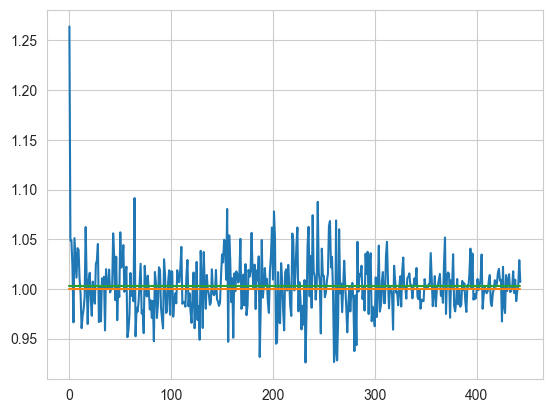

In [29]:
plt.plot(exp_change(close_dt['فزر']))
plt.plot([1] * len(exp_change(close_dt['فزر'])))
plt.plot([mean_exp(exp_change(close_dt['فزر']))] * len(exp_change(close_dt['فزر'])))

In [20]:
return_data = {i: exp_change(close_dt[i]) for i in close_dt.columns[1:]}

In [31]:
#return_data

In [21]:
risk_return = pd.DataFrame({'mean': [mean_exp(return_data[i]) for i in close_dt.columns[1:]],
                            'var': [np.var(return_data[i]) for i in close_dt.columns[1:]]},
                           index=close_dt.columns[1:])

In [22]:
risk_return

,mean,var
آباد,1.000926,0.000998
آبادا,0.999460,0.000890
آپ,1.000669,0.000815
آسیا,1.001342,0.000914
اپال,1.000221,0.000307
...,...,...
پرداخت,1.001010,0.000725
جم,1.001493,0.000487
البرز,1.001151,0.000825
خلنت,1.002007,0.001177


In [23]:
#risk_return[risk_return['mean'] > np.quantile(risk_return['mean'], 0.75)]

In [24]:
#risk_return[risk_return['var'] < np.quantile(risk_return['var'], 0.25)]

In [25]:
ind1 = risk_return[risk_return['mean'] > np.quantile(risk_return['mean'], 0.75)].index
ind2 = risk_return[risk_return['var'] < np.quantile(risk_return['var'], 0.25)].index

In [26]:
#ind1

In [27]:
#ind2

In [28]:
def intersect(inp1, inp2):
    intersect_ = []
    if len(inp1) > len(inp2):
        for i in inp1:
            if i in inp2:
                intersect_.append(i)
    else:
        for i in inp2:
            if i in inp1:
                intersect_.append(i)
    return intersect_


In [29]:
select_ = intersect(ind1, ind2)

In [30]:
cor_stock = close_data.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15068\2488596456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_stock = close_data.corr()


In [31]:
cor_stock.loc[select_, select_]

,اردستان,افق,بفجر,بوعلی,پارس,تاصیکو,جم پیلن,خراسان,دارو,دعبید,...,توسن,ساوه,سپیدار,غمایه,کگهر,گوهران,ناما,نیان,وهامون,شاخص_کل
اردستان,1.000000,0.616867,0.241806,0.116283,0.379727,-0.198999,0.518174,0.647999,0.624325,0.468377,...,0.409850,0.426921,0.262957,-0.713393,0.593684,0.485261,-0.314720,-0.741279,0.068705,0.452676
افق,0.616867,1.000000,0.356872,0.248650,0.600744,0.090599,-0.695165,-0.494794,0.634780,0.830862,...,0.180629,-0.542291,-0.206139,-0.511159,0.094693,0.516063,-0.661942,-0.705444,0.065242,-0.365446
بفجر,0.241806,0.356872,1.000000,-0.266552,0.421312,0.789165,0.164926,0.609723,0.801474,0.127937,...,-0.451093,0.147223,0.277006,-0.292491,0.663605,0.876599,-0.090958,-0.507955,0.504672,0.720155
بوعلی,0.116283,0.248650,-0.266552,1.000000,0.072625,-0.198184,0.007267,0.047720,-0.327356,0.465662,...,0.250678,-0.343516,-0.454000,0.756963,0.001520,-0.187746,0.612880,0.718897,-0.158946,-0.172108
پارس,0.379727,0.600744,0.421312,0.072625,1.000000,0.261342,-0.397380,-0.107547,0.533085,0.185393,...,0.094274,-0.537921,-0.329097,-0.152475,0.318992,0.504153,-0.684886,-0.656225,0.297234,0.003552
تاصیکو,-0.198999,0.090599,0.789165,-0.198184,0.261342,1.000000,0.411207,0.517445,0.531730,-0.071277,...,-0.293576,0.081321,-0.204069,0.257183,0.746395,0.783778,0.053735,0.019647,0.004957,0.652758
جم پیلن,0.518174,-0.695165,0.164926,0.007267,-0.397380,0.411207,1.000000,0.965260,-0.141501,-0.686853,...,0.325525,0.748042,0.421191,0.125833,0.442542,-0.025698,0.061657,0.379624,0.366061,0.916126
خراسان,0.647999,-0.494794,0.609723,0.047720,-0.107547,0.517445,0.965260,1.000000,0.604951,0.097430,...,0.160003,0.704240,0.334918,-0.377913,0.700667,0.632381,-0.236638,-0.445942,0.288922,0.977500
دارو,0.624325,0.634780,0.801474,-0.327356,0.533085,0.531730,-0.141501,0.604951,1.000000,0.558900,...,0.428522,0.060439,0.466319,-0.459906,0.511254,0.908323,-0.267134,-0.443157,0.799270,0.717444
دعبید,0.468377,0.830862,0.127937,0.465662,0.185393,-0.071277,-0.686853,0.097430,0.558900,1.000000,...,0.093008,-0.286602,-0.214873,-0.530062,-0.188820,0.300375,-0.289649,-0.684031,0.164315,0.286996


In [32]:
#{'score': [np.sum(cor_stock[i]) for i in cor_stock[select_].columns]}

In [33]:
score = pd.DataFrame({'score': [np.sum(np.abs(cor_stock[i])) for i in cor_stock[select_].columns]},
                     index=cor_stock[select_].columns)

In [34]:
score

,score
اردستان,202.473552
افق,286.452717
بفجر,347.719256
بوعلی,182.382694
پارس,258.505147
تاصیکو,247.132105
جم پیلن,228.729134
خراسان,260.849403
دارو,381.391523
دعبید,230.910481


In [32]:
score[(score == score.min()).values]

,score
توسن,115.03168


In [33]:
s = score[(score == score.min()).values].index

In [34]:
s

Index(['توسن'], dtype='object')

In [35]:
score.loc[s[0], :]

score    115.03168
Name: توسن, dtype: float64

In [36]:
cor_stock.loc[select_, select_][s[0]]

اردستان    0.409850
افق        0.180629
بفجر      -0.451093
بوعلی      0.250678
پارس       0.094274
تاصیکو    -0.293576
جم پیلن    0.325525
خراسان     0.160003
دارو       0.428522
دعبید      0.093008
سآبیک      0.665574
سپید      -0.012432
شاملا     -0.036086
شپدیس     -0.499727
لوتوس     -0.024023
نوری       0.291681
وکغدیر    -0.444285
بپاس       0.046656
تجلی       0.369901
توسن       1.000000
ساوه       0.194562
سپیدار     0.295773
غمایه     -0.106254
کگهر       0.018736
گوهران    -0.159222
ناما       0.515151
نیان       0.116126
وهامون     0.150007
شاخص_کل    0.184807
Name: توسن, dtype: float64

In [37]:
pre_final = cor_stock.loc[select_, select_][s[0]].index[:-1]

In [38]:
#describe[pre_final]

In [39]:
describe_pre = describe[pre_final]

In [40]:
describe_pre

,اردستان,افق,بفجر,بوعلی,پارس,تاصیکو,جم پیلن,خراسان,دارو,دعبید,...,تجلی,توسن,ساوه,سپیدار,غمایه,کگهر,گوهران,ناما,نیان,وهامون
count,239.000000,1041.000000,1678.000000,684.000000,1223.000000,1066.000000,1035.000000,2352.000000,2990.000000,2715.000000,...,478.000000,554.000000,882.000000,664.000000,143.000000,1114.000000,1709.000000,157.000000,162.000000,586.000000
mean,23292.510460,51449.587896,15261.555423,60731.871345,70019.766966,8858.884615,108292.691787,45065.677721,15623.297324,17856.534438,...,1774.305439,19158.064982,78923.219955,43996.545181,69058.041958,37452.719928,3882.172030,13120.859873,152756.913580,2588.327645
std,5501.620729,30233.385790,8583.511094,18907.635338,69078.873007,3615.017240,51697.044472,50922.687311,13996.830098,12455.710074,...,437.375418,3793.084854,38199.748059,26292.983123,7178.421916,15100.989184,2971.454501,846.763480,28400.096629,673.395721
min,10000.000000,13770.000000,4200.000000,24550.000000,2055.000000,2200.000000,22500.000000,4810.000000,3939.000000,2347.000000,...,1002.000000,7630.000000,23500.000000,16302.000000,41500.000000,6800.000000,850.000000,10115.000000,75670.000000,1456.000000
25%,17980.000000,23050.000000,7374.750000,45882.500000,2798.500000,7792.500000,71180.000000,6924.500000,6022.500000,7344.000000,...,1380.500000,15935.000000,51300.000000,21050.000000,65050.000000,21311.750000,1157.000000,12630.000000,141200.000000,2011.000000
50%,26140.000000,54000.000000,14661.500000,57755.000000,41498.000000,8960.000000,112500.000000,11388.000000,8741.000000,15070.000000,...,1585.000000,20150.000000,60073.500000,25700.000000,68950.000000,44322.500000,3820.000000,13140.000000,159800.000000,2627.500000
75%,27410.000000,69850.000000,21007.500000,72280.000000,143520.000000,10660.000000,143970.000000,88132.500000,25195.750000,25705.000000,...,2210.000000,21687.500000,115744.250000,70812.500000,72775.000000,48099.750000,5340.000000,13780.000000,170737.500000,2962.500000
max,30500.000000,182210.000000,45640.000000,103560.000000,220950.000000,24740.000000,211900.000000,196500.000000,78970.000000,72510.000000,...,2570.000000,27900.000000,159000.000000,97000.000000,84100.000000,71990.000000,16400.000000,14600.000000,200200.000000,5089.000000


In [41]:
final = (describe_pre.loc[:, (describe_pre.loc['count', pre_final] > 200).values]).columns

In [42]:
describe[final]

,اردستان,افق,بفجر,بوعلی,پارس,تاصیکو,جم پیلن,خراسان,دارو,دعبید,...,نوری,وکغدیر,بپاس,تجلی,توسن,ساوه,سپیدار,کگهر,گوهران,وهامون
count,239.000000,1041.000000,1678.000000,684.000000,1223.000000,1066.000000,1035.000000,2352.000000,2990.000000,2715.000000,...,1005.000000,209.000000,2466.000000,478.000000,554.000000,882.000000,664.000000,1114.000000,1709.000000,586.000000
mean,23292.510460,51449.587896,15261.555423,60731.871345,70019.766966,8858.884615,108292.691787,45065.677721,15623.297324,17856.534438,...,103138.781095,18928.564593,17185.964315,1774.305439,19158.064982,78923.219955,43996.545181,37452.719928,3882.172030,2588.327645
std,5501.620729,30233.385790,8583.511094,18907.635338,69078.873007,3615.017240,51697.044472,50922.687311,13996.830098,12455.710074,...,40219.944496,6286.233421,24296.365445,437.375418,3793.084854,38199.748059,26292.983123,15100.989184,2971.454501,673.395721
min,10000.000000,13770.000000,4200.000000,24550.000000,2055.000000,2200.000000,22500.000000,4810.000000,3939.000000,2347.000000,...,32275.000000,12920.000000,1761.000000,1002.000000,7630.000000,23500.000000,16302.000000,6800.000000,850.000000,1456.000000
25%,17980.000000,23050.000000,7374.750000,45882.500000,2798.500000,7792.500000,71180.000000,6924.500000,6022.500000,7344.000000,...,69150.000000,13810.000000,2989.000000,1380.500000,15935.000000,51300.000000,21050.000000,21311.750000,1157.000000,2011.000000
50%,26140.000000,54000.000000,14661.500000,57755.000000,41498.000000,8960.000000,112500.000000,11388.000000,8741.000000,15070.000000,...,104000.000000,14700.000000,4256.500000,1585.000000,20150.000000,60073.500000,25700.000000,44322.500000,3820.000000,2627.500000
75%,27410.000000,69850.000000,21007.500000,72280.000000,143520.000000,10660.000000,143970.000000,88132.500000,25195.750000,25705.000000,...,134570.000000,26070.000000,20800.000000,2210.000000,21687.500000,115744.250000,70812.500000,48099.750000,5340.000000,2962.500000
max,30500.000000,182210.000000,45640.000000,103560.000000,220950.000000,24740.000000,211900.000000,196500.000000,78970.000000,72510.000000,...,208980.000000,32240.000000,105000.000000,2570.000000,27900.000000,159000.000000,97000.000000,71990.000000,16400.000000,5089.000000


In [43]:
port_str = ''
for i in final:
    port_str += f'{i},'

In [44]:
port_str[:-1]

'اردستان,افق,بفجر,بوعلی,پارس,تاصیکو,جم پیلن,خراسان,دارو,دعبید,سآبیک,سپید,شاملا,شپدیس,لوتوس,نوری,وکغدیر,بپاس,تجلی,توسن,ساوه,سپیدار,کگهر,گوهران,وهامون'

In [86]:
with open('F:\my project\data\\tehran_stock_exchange\\portfollio.txt', 'w+', encoding='utf-8') as f:
    f.write(port_str[:-1])

In [13]:
with open('F:\my project\data\\tehran_stock_exchange\\tse_log.txt', 'r') as f:
    ms = f.readlines()[-1]

In [14]:
ms

'1,(2024, 2, 14),1402-11-25_C:\\Users\\ADMIN\\Desktop\\test\n'

In [9]:
pd.read_excel('F:\my project\data\\tehran_stock_exchange\\enter_symbols.xlsx')

,Ticker,Ticker.1,Name,Market,Panel,Sector,Sub-Sector,Comment,Name(EN),Company Code(12),Ticker(4),Ticker(5),Ticker(12),Sector Code,Sub-Sector Code,Panel Code
0,اردستان,اردستان,سیمان اردستان,بورس,بازار دوم بورس,سیمان، آهک و گچ,تولید سیمان، آهک و گچ,-,Ardestan Cement,IRO1ARDS0004,ARDS,ARDS1,IRO1ARDS0001,53,5394,5
1,افق,افق,فروشگاههای زنجیره ای افق کوروش,بورس,بازار دوم بورس,خرده فروشی،باستثنای وسایل نقلیه موتوری,خرده فروشی انواع موادغذایی،نوشیدنی وغیره,-,Ofogh Koorosh,IRO1OFOG0003,OFOG,OFOG1,IRO1OFOG0001,47,4711,5
2,بفجر,بفجر,فجر انرژی خلیج فارس,بورس,بازار دوم بورس,عرضه برق، گاز، بخاروآب گرم,تولید،لنتقال و توزیع برق،گاز،بخاروآب گرم,-,Fajr E.Persia Gulf,IRO1BFJR0002,BFJR,BFJR1,IRO1BFJR0001,40,4011,5
3,بوعلی,بوعلی,پتروشیمی بوعلی سینا,بورس,بازار دوم بورس,محصولات شیمیایی,تولید مواد شیمیایی پایه به جز کود,-,BoualiSina Petro.,IRO1BONA0004,BONA,BONA1,IRO1BONA0001,44,4411,5
4,پارس,پارس,پتروشیمی پارس,بورس,بازار دوم بورس,محصولات شیمیایی,تولید مواد شیمیایی پایه به جز کود,-,PARS Petrochemical,IRO1PARS0000,PARS,PARS1,IRO1PARS0001,44,4411,5
5,تاصیکو,تاصیکو,سرمایه گذاری صدرتامین,بورس,بازار دوم بورس,استخراج کانه های فلزی,استخراج سایر کانه های فلزی,-,Sadr Tamin Inv.,IRO1SADR0004,SADR,SADR1,IRO1SADR0001,13,1399,5
6,جم پیلن,جم پیلن,پتروشیمی جم پیلن,بورس,بازار دوم بورس,محصولات شیمیایی,تولید مواد شیمیایی پایه به جز کود,-,Jam Pilen,IRO1JPPC0001,JPPC,JPPC1,IRO1JPPC0001,44,4411,5
7,خراسان,خراسان,پتروشیمی خراسان,بورس,بازار دوم بورس,محصولات شیمیایی,تولید کود و ترکیبات نیتروژن,-,Khorasan Petro.,IRO1KRSN0000,KRSN,KRSN1,IRO1KRSN0001,44,4412,5
8,دارو,دارو,کارخانجات داروپخش,بورس,بازار دوم بورس,مواد و محصولات دارویی,تولید داروهای شیمیایی و گیاهی,-,Daroupakhsh P.,IRO1DPAK0004,DPAK,DPAK1,IRO1DPAK0001,43,4323,5
9,دعبید,دعبید,لابراتوارداروسازی دکترعبیدی,بورس,بازار دوم بورس,مواد و محصولات دارویی,تولید داروهای شیمیایی و گیاهی,-,Dr. Abidi Lab.,IRO1ABDI0004,ABDI,ABDI1,IRO1ABDI0001,43,4323,5


In [17]:
os.listdir('F:\my project\data\\tehran_stock_exchange')

['all_close_data.xlsx',
 'build',
 'close_data.xlsx',
 'dist',
 'enter_symbols.xlsx',
 'major_symbols.xlsx',
 'portfollio.txt',
 'symbols.xlsx',
 'tse_errors.txt',
 'tse_get_data.py',
 'tse_get_data.spec',
 'tse_log.txt']

In [20]:
a = 0
if 'select_symbols.xlsx' not in os.listdir() or 'enter_symbols.xlsx' not in os.listdir(
        'F:\my project\data\\tehran_stock_exchange'):
    a += 1

elif 'select_symbols.xlsx' in os.listdir('F:\my project\data\\tehran_stock_exchange'):
    a += 1
elif 'enter_symbols.xlsx' in os.listdir('F:\my project\data\\tehran_stock_exchange'):
    a += 1


In [21]:
print(a)

1


In [35]:
return_data['فزر']

array([1.26404494, 1.04888889, 1.04872881, 1.02222222, 0.96640316,
       1.05112474, 1.0311284 , 1.01132075, 1.04104478, 1.03942652,
       1.01034483, 0.99488055, 0.96054889, 0.97321429, 0.97981651,
       0.99250936, 1.06226415, 1.0071048 , 0.96472663, 1.00914077,
       1.01630435, 0.98930481, 0.97297297, 1.00740741, 0.99264706,
       0.98518519, 1.02506189, 1.02862254, 1.04521739, 0.96672213,
       1.00172117, 0.96735395, 1.01065719, 1.        , 1.01230228,
       0.95833333, 1.01992754, 1.        , 1.        , 1.01953819,
       0.99651568, 1.        , 1.        , 1.05594406, 1.03311258,
       0.98878205, 1.03241491, 0.96860283, 1.00324149, 0.99192246,
       1.05700326, 1.02157165, 1.02564103, 1.04411765, 0.9971831 ,
       1.01129944, 1.02234637, 0.95150274, 0.95833333, 0.97391304,
       1.01607143, 0.99297012, 1.        , 0.98761062, 1.09139785,
       0.95238095, 0.98103448, 0.9771529 , 0.98741007, 1.00546448,
       1.02536232, 0.97526502, 0.97826087, 0.95555556, 1.02325

In [37]:
a = pd.value_counts(return_data['فزر'])

In [38]:
a

1.000000    15
0.958333     3
1.003550     2
1.022222     2
1.006912     2
            ..
0.986450     1
0.982952     1
0.987375     1
0.989589     1
1.007035     1
Length: 424, dtype: int64

In [58]:
#sb.barplot(a)

{'whiskers': [<matplotlib.lines.Line2D at 0x2026e5a8310>,
 'caps': [<matplotlib.lines.Line2D at 0x2026e5f4310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2026e5a8100>],
 'medians': [<matplotlib.lines.Line2D at 0x2026e5f4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2026e5f4af0>],
 'means': []}

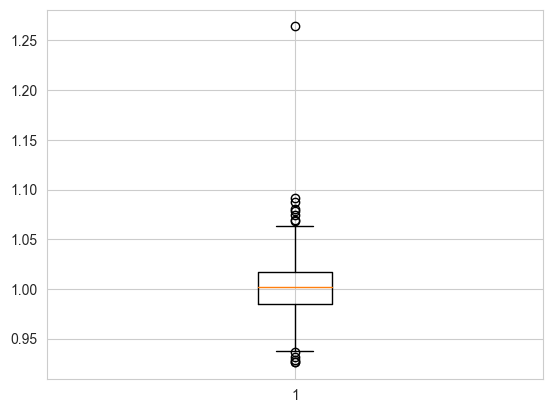

In [43]:
plt.boxplot(return_data['فزر'])

In [44]:
skew(return_data['فزر'])

1.6847217319777177

In [45]:
kurtosis(return_data['فزر'])

13.462612999193713

In [46]:
return_data['شاخص_کل']

array([0.9534501 , 1.00801381, 1.0092955 , ..., 0.99609257, 0.9992404 ,
       0.9943726 ])

In [47]:
skew(return_data['شاخص_کل'])

0.6241704119609248

In [48]:
kurtosis(return_data['شاخص_کل'])

6.018290874146153

<Axes: >

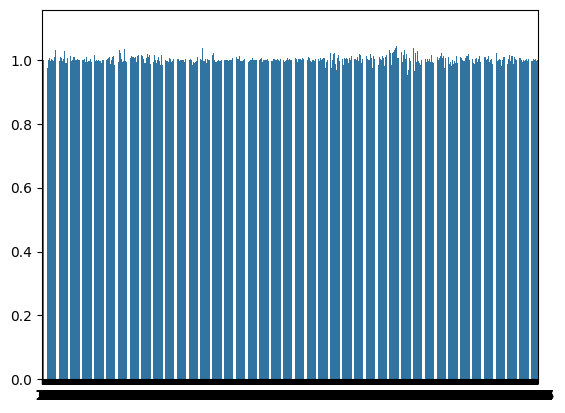

In [64]:
#sb.barplot(return_data['شاخص_کل'])

In [69]:
a = pd.value_counts(return_data['شاخص_کل'])
a

In [68]:
sb.barplot(pd.value_counts(return_data['شاخص_کل']))

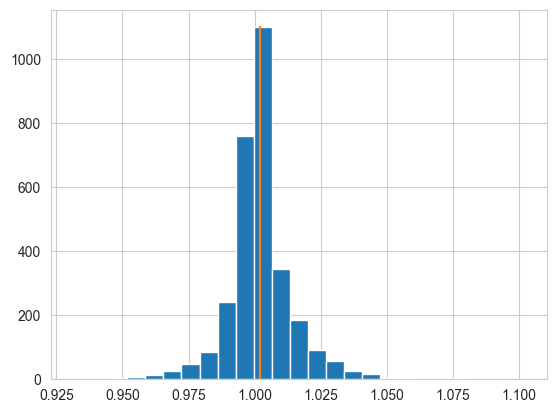

In [67]:
a = plt.hist(return_data['شاخص_کل'], bins=25)
#plt.plot([1]*50,a[0])
plt.plot([np.mean(return_data['شاخص_کل'])] * 25, a[0])
plt.show()

In [53]:
a[0]

array([  1.,   0.,   0.,   0.,   2.,   3.,   4.,   2.,   0.,  14.,  17.,
        10.,  28.,  19.,  40.,  44.,  70., 172., 255., 505., 759., 339.,
       206., 139., 107.,  79.,  55.,  37.,  27.,  30.,  12.,  13.,  11.,
         5.,   4.,   0.,   3.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,
         0.,   0.,   0.,   0.,   0.,   1.])

In [61]:
return_data['فزر']

array([1.26404494, 1.04888889, 1.04872881, 1.02222222, 0.96640316,
       1.05112474, 1.0311284 , 1.01132075, 1.04104478, 1.03942652,
       1.01034483, 0.99488055, 0.96054889, 0.97321429, 0.97981651,
       0.99250936, 1.06226415, 1.0071048 , 0.96472663, 1.00914077,
       1.01630435, 0.98930481, 0.97297297, 1.00740741, 0.99264706,
       0.98518519, 1.02506189, 1.02862254, 1.04521739, 0.96672213,
       1.00172117, 0.96735395, 1.01065719, 1.        , 1.01230228,
       0.95833333, 1.01992754, 1.        , 1.        , 1.01953819,
       0.99651568, 1.        , 1.        , 1.05594406, 1.03311258,
       0.98878205, 1.03241491, 0.96860283, 1.00324149, 0.99192246,
       1.05700326, 1.02157165, 1.02564103, 1.04411765, 0.9971831 ,
       1.01129944, 1.02234637, 0.95150274, 0.95833333, 0.97391304,
       1.01607143, 0.99297012, 1.        , 0.98761062, 1.09139785,
       0.95238095, 0.98103448, 0.9771529 , 0.98741007, 1.00546448,
       1.02536232, 0.97526502, 0.97826087, 0.95555556, 1.02325

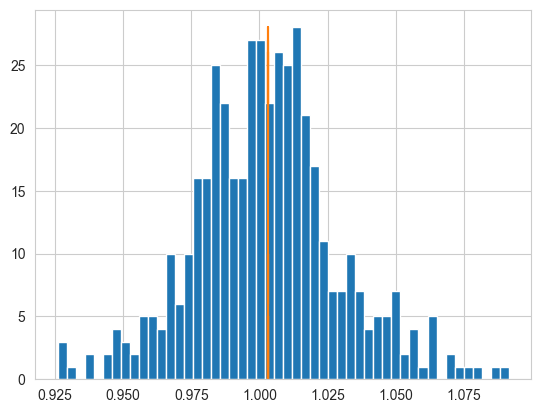

In [62]:
b = plt.hist(return_data['فزر'][1:], bins=50)
plt.plot([np.mean(return_data['فزر'])] * 50, b[0])
plt.show()

In [63]:
skew(return_data['فزر'][1:])

0.2100276061755898

In [64]:
kurtosis(return_data['فزر'][1:])

0.6389165971769435

In [65]:
skew(return_data['شاخص_کل'])

0.6241704119609248

In [66]:
kurtosis(return_data['شاخص_کل'])

6.018290874146153

In [68]:
risk_return

,mean,var
آباد,1.000953,0.000998
آبادا,0.999515,0.000895
آپ,1.000679,0.000816
آسیا,1.001355,0.000916
اپال,1.000220,0.000309
...,...,...
حتوکا,1.000846,0.000931
تاپیکو,1.001293,0.000540
تکمبا,1.001048,0.000887
خبهمن,1.001194,0.000751


In [71]:
risk_return[risk_return['var'] == np.max(risk_return['var'])]

,mean,var
کرومیت,1.030573,0.005559


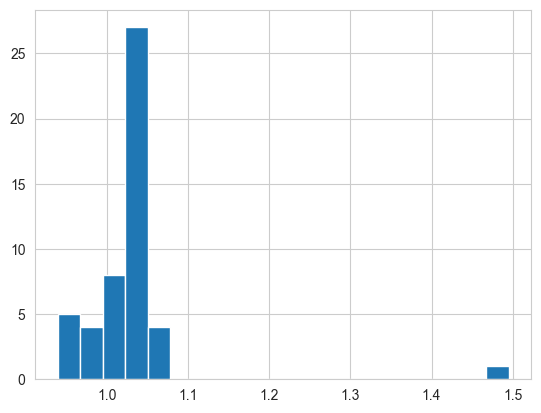

In [72]:
a = plt.hist(return_data['کرومیت'], bins=20)

In [35]:
selected = cor_stock.loc[select_, select_]

In [36]:
np.abs(selected) < 0.2

,اردستان,افق,بفجر,بوعلی,پارس,تاصیکو,جم پیلن,خراسان,دارو,دعبید,...,توسن,ساوه,سپیدار,غمایه,کگهر,گوهران,ناما,نیان,وهامون,شاخص_کل
اردستان,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
افق,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
بفجر,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,False
بوعلی,True,False,False,False,True,True,True,True,False,False,...,False,False,False,False,True,True,False,False,True,True
پارس,False,False,False,True,False,False,False,True,False,True,...,True,False,False,True,False,False,False,False,False,True
تاصیکو,True,True,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,True,False
جم پیلن,False,False,True,True,False,False,False,False,True,False,...,False,False,False,True,False,True,True,False,False,False
خراسان,False,False,False,True,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
دارو,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
دعبید,False,False,True,False,True,True,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False


In [37]:
selected[np.abs(selected) < 0.2].iloc[:-1, :-1]

,اردستان,افق,بفجر,بوعلی,پارس,تاصیکو,جم پیلن,خراسان,دارو,دعبید,...,تجلی,توسن,ساوه,سپیدار,غمایه,کگهر,گوهران,ناما,نیان,وهامون
اردستان,NaN,NaN,NaN,0.116283,NaN,-0.198999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068705
افق,NaN,NaN,NaN,NaN,NaN,0.090599,NaN,NaN,NaN,NaN,...,NaN,0.180629,NaN,NaN,NaN,0.094693,NaN,NaN,NaN,0.065242
بفجر,NaN,NaN,NaN,NaN,NaN,NaN,0.164926,NaN,NaN,0.127937,...,NaN,NaN,0.147223,NaN,NaN,NaN,NaN,-0.090958,NaN,NaN
بوعلی,0.116283,NaN,NaN,NaN,0.072625,-0.198184,0.007267,0.047720,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.001520,-0.187746,NaN,NaN,-0.158946
پارس,NaN,NaN,NaN,0.072625,NaN,NaN,NaN,-0.107547,NaN,0.185393,...,NaN,0.094274,NaN,NaN,-0.152475,NaN,NaN,NaN,NaN,NaN
تاصیکو,-0.198999,0.090599,NaN,-0.198184,NaN,NaN,NaN,NaN,NaN,-0.071277,...,-0.189358,NaN,0.081321,NaN,NaN,NaN,NaN,0.053735,0.019647,0.004957
جم پیلن,NaN,NaN,0.164926,0.007267,NaN,NaN,NaN,NaN,-0.141501,NaN,...,NaN,NaN,NaN,NaN,0.125833,NaN,-0.025698,0.061657,NaN,NaN
خراسان,NaN,NaN,NaN,0.047720,-0.107547,NaN,NaN,NaN,NaN,0.097430,...,NaN,0.160003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
دارو,NaN,NaN,NaN,NaN,NaN,NaN,-0.141501,NaN,NaN,NaN,...,NaN,NaN,0.060439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
دعبید,NaN,NaN,0.127937,NaN,0.185393,-0.071277,NaN,0.097430,NaN,NaN,...,-0.144342,0.093008,NaN,NaN,NaN,-0.188820,NaN,NaN,NaN,0.164315


In [47]:
selected.columns[:-1]

Index(['اردستان', 'افق', 'بفجر', 'بوعلی', 'پارس', 'تاصیکو', 'جم پیلن',
       'خراسان', 'دارو', 'دعبید', 'سآبیک', 'سپید', 'شاملا', 'شپدیس', 'لوتوس',
       'نوری', 'وکغدیر', 'بپاس', 'تجلی', 'توسن', 'ساوه', 'سپیدار', 'غمایه',
       'کگهر', 'گوهران', 'ناما', 'نیان', 'وهامون'],
      dtype='object')

In [38]:
col = selected.columns[:-1]

In [39]:
col

Index(['اردستان', 'افق', 'بفجر', 'بوعلی', 'پارس', 'تاصیکو', 'جم پیلن',
       'خراسان', 'دارو', 'دعبید', 'سآبیک', 'سپید', 'شاملا', 'شپدیس', 'لوتوس',
       'نوری', 'وکغدیر', 'بپاس', 'تجلی', 'توسن', 'ساوه', 'سپیدار', 'غمایه',
       'کگهر', 'گوهران', 'ناما', 'نیان', 'وهامون'],
      dtype='object')

In [57]:
selected.to_excel('portfollio.xlsx')

In [40]:
#col.drop(['ناما', 'نیان', 'کگهر'])

In [66]:
all=[]
n_=0
for i in range(s):
    for j in range(0,i):
        for k in range(0,j):
            for l in range(0,k):
                for m in range(0,l):
                    all.append([col[i],col[j],col[k],col[l],col[m]])
                    n_+=1
                    if n_==98280:
                        break

In [67]:
all[0]

['پارس', 'بوعلی', 'بفجر', 'افق', 'اردستان']

In [68]:
all[1]

['تاصیکو', 'بوعلی', 'بفجر', 'افق', 'اردستان']

In [69]:
np.sum(np.sum(np.abs(selected.loc[all[0],all[0]])))

11.642875225810661

In [70]:
np.sum(np.abs(selected))

اردستان    12.564644
افق        13.357749
بفجر       14.261992
بوعلی       8.459123
پارس       11.682576
تاصیکو     10.608468
جم پیلن    13.172059
خراسان     14.593479
دارو       16.620937
دعبید      10.732833
سآبیک      17.600608
سپید       10.726293
شاملا      14.577202
شپدیس      12.357758
لوتوس      13.340713
نوری       13.662144
وکغدیر     13.556603
بپاس       14.447654
تجلی       15.321168
توسن        7.818160
ساوه       12.009628
سپیدار     12.579055
غمایه      14.419416
کگهر       12.668040
گوهران     14.828843
ناما       11.661800
نیان       15.903995
وهامون     11.047697
شاخص_کل    16.731417
dtype: float64

In [71]:
min_score = 26
ind_=[]
for i in all:
    if np.sum(np.sum(np.abs(selected.loc[i, i]))) < min_score:
        min_score =np.sum(np.sum(np.abs(selected.loc[i, i])))
        ind_=i

In [72]:
min_score

7.256196984781791

In [73]:
ind_

['وهامون', 'توسن', 'لوتوس', 'خراسان', 'بوعلی']